## 1. Import Data

In [1]:
# Importing pandas
import pandas as pd

# Reading in the data
df = pd.read_csv('datasets/cookie_cats.csv')

# Showing the first few rows
print(df.head())

   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True


## 2. The AB-test data
<p>The data we have is from 90,189 players that installed the game while the AB-test was running. The variables are:</p>
<ul>
<li><code>userid</code> - a unique number that identifies each player.</li>
<li><code>version</code> - whether the player was put in the control group (<code>gate_30</code> - a gate at level 30) or the group with the moved gate (<code>gate_40</code> - a gate at level 40).</li>
<li><code>sum_gamerounds</code> - the number of game rounds played by the player during the first 14 days after install.</li>
<li><code>retention_1</code> - did the player come back and play <strong>1 day</strong> after installing?</li>
<li><code>retention_7</code> - did the player come back and play <strong>7 days</strong> after installing?</li>
</ul>

In [2]:
# Counting the number of players in each AB group.
df.groupby('version')['userid'].count()

version
gate_30    44700
gate_40    45489
Name: userid, dtype: int64

## 3. The distribution of game rounds

Text(0, 0.5, 'Player')

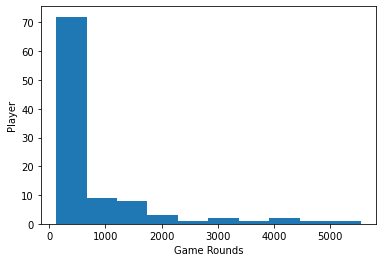

In [3]:
# This command makes plots appear in the notebook
%matplotlib inline

# Counting the number of players for each number of gamerounds 
plot_df = df.groupby('sum_gamerounds')['userid'].count()

# Plotting the distribution of players that played 0 to 100 game rounds
ax = plot_df.head(100).plot(x = 'sum_gamerounds', y = 'userid', kind = 'hist')
ax.set_xlabel("Game Rounds")
ax.set_ylabel("Player")

## 4. Overall 1-day retention

In [4]:
# The % of users that came back the day after they installed
df['retention_1'].mean() 

0.4452095044850259

## 5. 1-day retention by AB-group

In [5]:
# Calculating 1-day retention for each AB-group
df.groupby('version')['retention_1'].mean() 

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

## 6. Bootstrapping 1-day retention by AB-group

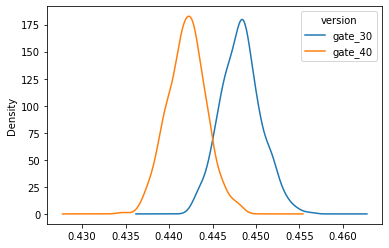

In [6]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(500):
    boot_mean = df.sample(frac = 1, replace = True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot.kde()

## 7. Zooming in on the difference

retention_1    2.533476
retention_1    1.838136
retention_1    0.890870
retention_1    2.464807
retention_1    1.295699
                 ...   
retention_1    1.216807
retention_1    2.123969
retention_1    1.534825
retention_1    1.557771
retention_1    0.603173
Name: diff, Length: 500, dtype: float64

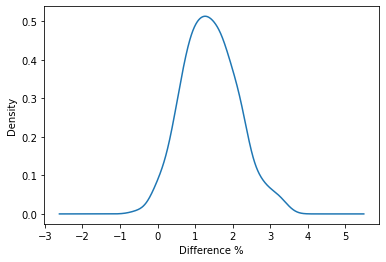

In [7]:
# Adding a column with the % difference between the two AB-groups
boot_1d['diff'] = ((boot_1d['gate_30'] - boot_1d['gate_40']) /boot_1d['gate_40']) * 100

# Ploting the bootstrap % difference
ax = boot_1d['diff'].plot.kde()
ax.set_xlabel('Difference %') 
boot_1d['diff']

In [8]:
# Calculating the probability that 1-day retention is greater when the gate is at level 30
prob = (boot_1d['diff'] > 0).mean()
prob

0.986

## 8. 7-day retention by AB-group

In [9]:
# Calculating 7-day retention for both AB-groups
df.groupby('version')['retention_7'].mean()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

## 9. Bootstrapping 7-day retention by AB-group

1.0

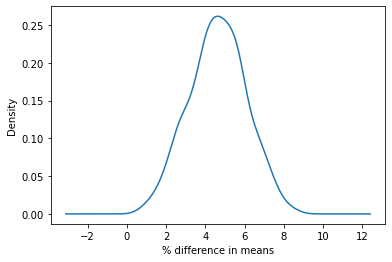

In [10]:
# Creating a list with bootstrapped means for each AB-group
boot_7d = []
for i in range(500):
    boot_mean = df.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_7d = pd.DataFrame(boot_7d)

# Adding a column with the % difference between the two AB-groups
boot_7d['diff'] = ((boot_7d['gate_30'] - boot_7d['gate_40'])/ boot_7d['gate_40']) * 100

# Ploting the bootstrap % difference
ax = boot_7d['diff'].plot.kde()
ax.set_xlabel("% difference in means")

# Calculating the probability that 7-day retention is greater when the gate is at level 30
prob = (boot_7d['diff'] > 0).mean()
prob